In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
%matplotlib inline

In [11]:
plt.rcParams['svg.fonttype'] = 'none'

In [12]:
ale_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")

In [13]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_replicate_growth.csv", index_col=0)

comp_list = ["HMDA", "PUTR", "12PD", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
for comp in comp_list:
    recon_df = recon_df[~recon_df["strain"].str.startswith(comp)]
    
recon_df["replicate"] = recon_df["strain"]
recon_df["strain"] = recon_df["replicate"].map(lambda x: x[:-2])

In [14]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

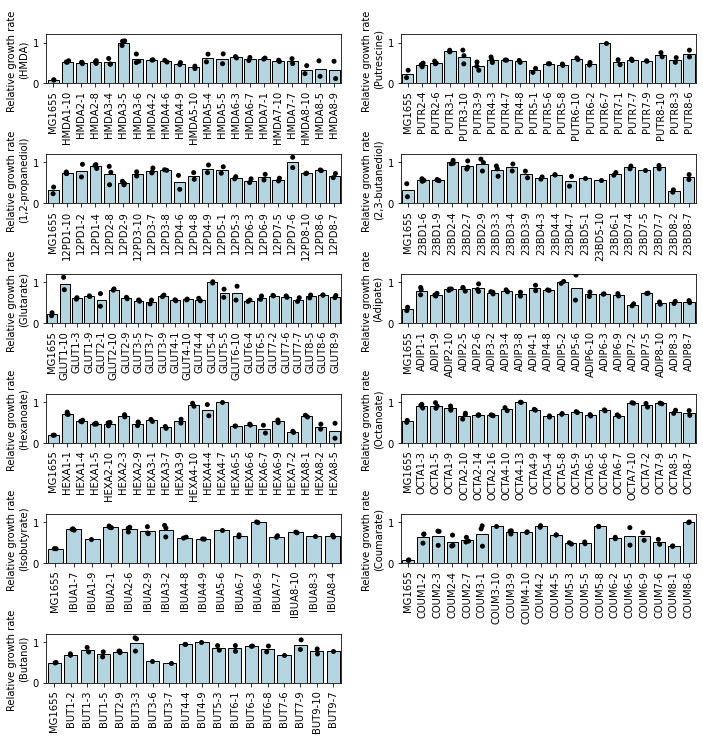

In [42]:
comp_order = [
    "HMDA", "putrescine", "1,2-propanediol", "2,3-butanediol", "glutarate", "adipate",
    "hexanoate", "octanoate", "isobutyrate", "coumarate", "butanol"
]


plt.figure(figsize=[10, 10])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = ale_df[ale_df["compound"] == comp]
    comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])
    
    #Normalize growth rates by the max
    comp_df['growth_rate']=comp_df['growth_rate']/comp_df[['growth_rate','strain']].groupby('strain').mean().max().values[0]
    
    sbn.barplot(x="strain", y="growth_rate", data=comp_df, errwidth=0, color="lightblue", edgecolor="black")
    plt.ylim(0,1.2)
    plt.xticks(rotation=90)
    sbn.stripplot(x="strain", y="growth_rate", data=comp_df, color="black")
    plt.xlabel("")
    plt.ylabel("Relative growth rate \n({})".format(prettify(comp)))

plt.tight_layout()
#plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.svg")

In [28]:
comp_df

,compound,strain,growth_rate,experiment,well,repl
144,butanol,MG1655,0.440535,ALE_butanol_duplicates_060514,A01,1
148,butanol,MG1655,0.451469,ALE_butanol_duplicates_060514,A05,2
152,butanol,BUT1-2,0.610814,ALE_butanol_duplicates_060514,B01,1
156,butanol,BUT1-2,0.642909,ALE_butanol_duplicates_060514,B05,2
160,butanol,BUT1-3,0.684928,ALE_butanol_duplicates_060514,C01,1
164,butanol,BUT1-3,0.785093,ALE_butanol_duplicates_060514,C05,2
187,butanol,BUT1-5,0.687388,ALE_butanol_duplicates_060514,F04,3
172,butanol,BUT1-5,0.575142,ALE_butanol_duplicates_060514,D05,2
180,butanol,BUT2-9,0.699400,ALE_butanol_duplicates_060514,E05,2
176,butanol,BUT2-9,0.669367,ALE_butanol_duplicates_060514,E01,1


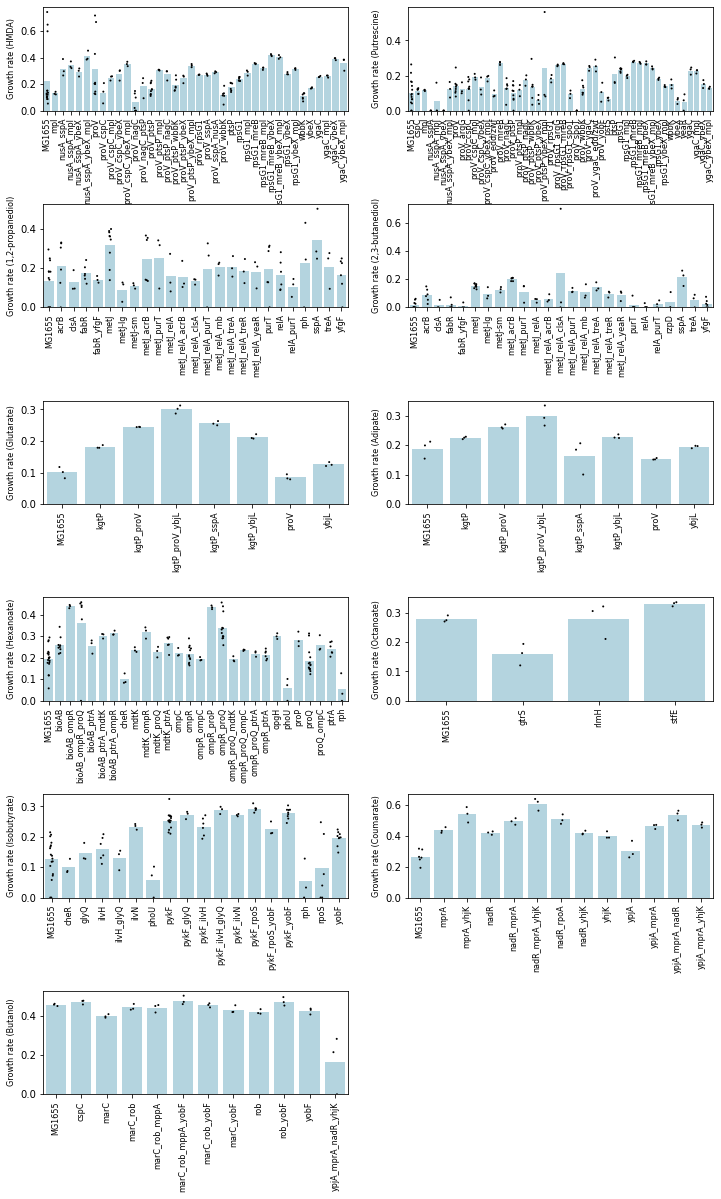

In [16]:
plt.figure(figsize=[12, 20])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=8)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=2)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=10)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")